In [2]:
"""
6. Quais são as características mais proeminentes de um cliente que possua
empréstimo imobiliário?

não sei, vamos deixar um alg de clustering me responder isso 
"""

'\n6. Quais são as características mais proeminentes de um cliente que possua\nempréstimo imobiliário?\n'

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 


In [152]:
data = pd.read_csv('data/bank-full.csv',sep = ';')
final = data

#dicionário para deixar mais bonito
boolean = {'no':0, 
           'yes':1}
#só oq utilizarei no cluster
data = data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan']]
#replace com o dict 
data[['default','balance','loan', 'housing' ]] = data[['default','balance','loan', 'housing' ]].replace(boolean)
#pegando os dummies
data = pd.get_dummies(data, columns=['job', 'marital', 'education'])
#dropando pra evitar a dependencia linear
data.drop(['job_student', 'marital_married', 'education_unknown'], axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [157]:
data = data[data['housing']==1]

In [159]:
#deixando tudo no scaler
scaler = StandardScaler()
for i in ['age','balance']:
    scaler.fit(data[[i]])
    data[[i]] = scaler.transform(data[[i]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

In [160]:
x = ['age', 'default', 'balance', 'loan', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary']
y = ['housing']
#nome de coluna >>> infinito >>> iloc com index

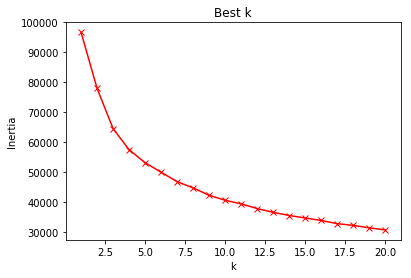

In [161]:
inertia = []
for k in range(1,21):
    km = KMeans(n_clusters=k)
    km = km.fit(np.array(data[x]))
    inertia.append(km.inertia_)
    
plt.plot(range(1,21), inertia, 'bx-', color = 'red')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Best k')
plt.show()

In [ ]:
#12 é um ótimo número 


In [164]:
data.sample(3)

,age,default,balance,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_self-employed,job_services,job_technician,job_unemployed,job_unknown,marital_divorced,marital_single,education_primary,education_secondary,education_tertiary
19180,1.212631,0,-0.277502,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
907,1.212631,0,-0.321396,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38293,1.548705,0,-0.388647,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [166]:
km = KMeans(n_clusters=12)
km.fit(np.array(data[x]))
km.predict(np.array(data[x]))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [177]:
final = final[final['housing']== 'yes'][['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan']]
final['predicted'] = km.predict(np.array(data[x]))

In [186]:
final.groupby(['predicted']).describe()

age                                                     balance  \
            count       mean        std   min   25%   50%   75%   max   count   
predicted                                                                       
0          1904.0  48.978466   5.564041  40.0  44.0  48.0  53.0  71.0  1904.0   
1          2236.0  27.982558   3.201951  20.0  26.0  28.0  30.0  37.0  2236.0   
2           153.0  41.529412  10.183875  25.0  33.0  39.0  48.0  71.0   153.0   
3          2251.0  37.048423   4.551421  26.0  33.0  37.0  41.0  46.0  2251.0   
4          2939.0  51.938414   4.379382  43.0  48.0  51.0  55.0  78.0  2939.0   
5          4054.0  33.349285   4.008485  20.0  31.0  33.0  36.0  43.0  4054.0   
6          1923.0  36.665627   4.806235  26.0  33.0  36.0  40.0  47.0  1923.0   
7          1735.0  50.789049   5.000392  43.0  46.0  50.0  55.0  75.0  1735.0   
8          2730.0  36.562271   4.917789  26.0  33.0  36.0  40.0  46.0  2730.0   
9          1838.0  36.011425   5.013795  24.0  32.0  36.0  40.0  47.0  1838.0   
10         2100.0  35.760000   4.823865  20.0  32.0  36.0  40.0  44.0  2100.0   
11         1267.0  40.512234   8.319003  22.0  34.0  39.0  46.0  65.0  1267.0   

                                                                           \
                   mean          std      min       25%      50%      75%   
predicted                                                                   
0            902.499475  1250.952610  -4057.0     61.50    477.0   1379.0   
1            576.351073   949.945964  -1414.0     32.75    277.0    748.5   
2          21010.000000  7232.231861  14190.0  16563.00  18904.0  22867.0   
3            581.915149   910.068995  -1882.0     10.00    292.0    879.0   
4            882.346717  1193.439511  -1944.0     79.00    478.0   1316.0   
5            806.254810  1078.152697  -3058.0     76.25    452.5   1166.0   
6            643.032761   967.375334  -1701.0     32.50    344.0    912.0   
7            783.584438  1180.213208  -2604.0     61.00    343.0   1044.5   
8            619.240293   902.322921  -2093.0     41.00    337.5    898.0   
9            646.856366   947.667568  -1386.0     43.25    345.5    885.5   
10           644.737619  1003.921895  -1489.0     28.00    290.0    849.5   
11          7346.169692  2404.207750   3684.0   5481.00   6649.0   8628.0   

                    
               max  
predicted           
0           6144.0  
1           5533.0  
2          58544.0  
3           4867.0  
4           7111.0  
5           5288.0  
6           4800.0  
7           6307.0  
8           4635.0  
9           4925.0  
10          5151.0  
11         14148.0

In [192]:
final.groupby(['predicted','marital']).count()

age   job  education  default  balance  housing  loan
predicted marital                                                         
0         divorced   434   434        434      434      434      434   434
          married   1274  1274       1274     1274     1274     1274  1274
          single     196   196        196      196      196      196   196
1         divorced     6     6          6        6        6        6     6
          married    238   238        238      238      238      238   238
          single    1992  1992       1992     1992     1992     1992  1992
2         divorced    17    17         17       17       17       17    17
          married     98    98         98       98       98       98    98
          single      38    38         38       38       38       38    38
3         divorced   334   334        334      334      334      334   334
          married   1637  1637       1637     1637     1637     1637  1637
          single     280   280        280      280      280      280   280
4         divorced   613   613        613      613      613      613   613
          married   2117  2117       2117     2117     2117     2117  2117
          single     209   209        209      209      209      209   209
5         divorced   250   250        250      250      250      250   250
          married   1851  1851       1851     1851     1851     1851  1851
          single    1953  1953       1953     1953     1953     1953  1953
6         divorced   255   255        255      255      255      255   255
          married   1133  1133       1133     1133     1133     1133  1133
          single     535   535        535      535      535      535   535
7         divorced   231   231        231      231      231      231   231
          married   1418  1418       1418     1418     1418     1418  1418
          single      86    86         86       86       86       86    86
8         divorced   219   219        219      219      219      219   219
          married   2204  2204       2204     2204     2204     2204  2204
          single     307   307        307      307      307      307   307
9         divorced   282   282        282      282      282      282   282
          married    987   987        987      987      987      987   987
          single     569   569        569      569      569      569   569
10        divorced   138   138        138      138      138      138   138
          married   1565  1565       1565     1565     1565     1565  1565
          single     397   397        397      397      397      397   397
11        divorced   128   128        128      128      128      128   128
          married    799   799        799      799      799      799   799
          single     340   340        340      340      340      340   340

In [193]:
final.groupby(['predicted','education']).count()

age   job  marital  default  balance  housing  loan
predicted education                                                      
0         tertiary   1835  1835     1835     1835     1835     1835  1835
          unknown      69    69       69       69       69       69    69
1         primary      23    23       23       23       23       23    23
          secondary  2136  2136     2136     2136     2136     2136  2136
          tertiary      1     1        1        1        1        1     1
          unknown      76    76       76       76       76       76    76
2         primary       5     5        5        5        5        5     5
          secondary    54    54       54       54       54       54    54
          tertiary     89    89       89       89       89       89    89
          unknown       5     5        5        5        5        5     5
3         secondary  2202  2202     2202     2202     2202     2202  2202
          unknown      49    49       49       49       49       49    49
4         secondary  2776  2776     2776     2776     2776     2776  2776
          tertiary      3     3        3        3        3        3     3
          unknown     160   160      160      160      160      160   160
5         tertiary   4010  4010     4010     4010     4010     4010  4010
          unknown      44    44       44       44       44       44    44
6         secondary  1861  1861     1861     1861     1861     1861  1861
          unknown      62    62       62       62       62       62    62
7         primary    1632  1632     1632     1632     1632     1632  1632
          unknown     103   103      103      103      103      103   103
8         secondary  2589  2589     2589     2589     2589     2589  2589
          tertiary      3     3        3        3        3        3     3
          unknown     138   138      138      138      138      138   138
9         secondary  1799  1799     1799     1799     1799     1799  1799
          unknown      39    39       39       39       39       39    39
10        primary    2074  2074     2074     2074     2074     2074  2074
          unknown      26    26       26       26       26       26    26
11        primary     160   160      160      160      160      160   160
          secondary   621   621      621      621      621      621   621
          tertiary    437   437      437      437      437      437   437
          unknown      49    49       49       49       49       49    49

In [ ]:
"""
Profissão é uma uma feature que importa dado que há um cluster apenas para administradores e 
colarinhos azul

Escolaridade também dado que 'tertiary'

"""